# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejmplo encajaria muy bien una regresión lineal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [2]:
df.shape

(30, 2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

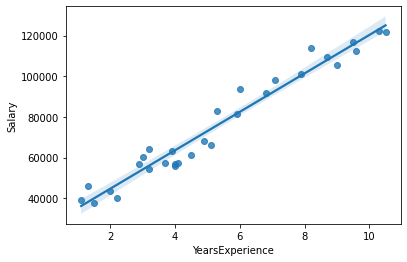

In [3]:
sns.regplot(data=df, x='YearsExperience', y='Salary')

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df['YearsExperience'].values.reshape(-1, 1), df['Salary'].values.reshape(-1, 1))

LinearRegression()

In [13]:
model.coef_

array([[9449.96232146]])

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [14]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<AxesSubplot:xlabel='Level', ylabel='Salary'>

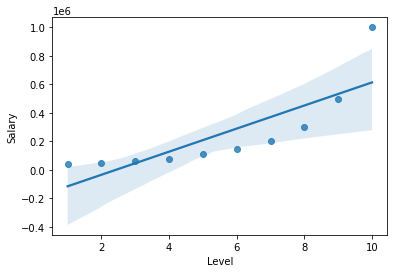

In [15]:
sns.regplot(data=df, x='Level', y='Salary')

In [19]:
X = df['Level'].values.reshape(-1, 1)
y = df['Salary']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

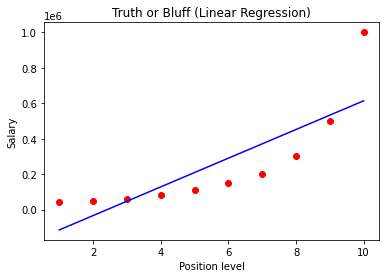

In [17]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias. Si degree = 3 y tenemos dos features (a, b), realizará 

$$a^2, b^2, a^3, b^3, ab, a^2b, ab^2$$

In [28]:
poly_reg = PolynomialFeatures(3)
X_pol = poly_reg.fit_transform(X)
X_pol

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

$$y = a_0*1 + a_1*x + a_2*x^2 + a_3*x^3$$
$$y = a_0*col_0 + a_1*col_1 + a_2*col_2 + a_3*col_3$$

In [38]:
poly_reg = PolynomialFeatures(3)
X_pol = poly_reg.fit_transform(X)
X_pol

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [39]:
pol_lin = LinearRegression()
pol_lin.fit(X_pol, y)

LinearRegression()

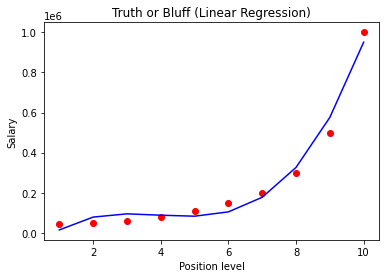

In [40]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_lin.predict(X_pol), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

GRADO: 3

MAE: 34790.209790209905
MSE: 1515662004.6620073
RMSE: 38931.504012329235



GRADO: 3

MAE: 34790.209790209905
MSE: 1515662004.6620073
RMSE: 38931.504012329235



GRADO: 4

MAE: 12681.818181823166
MSE: 210343822.84382358
RMSE: 14503.23490962701



GRADO: 4

MAE: 12681.818181823166
MSE: 210343822.84382358
RMSE: 14503.23490962701



GRADO: 5

MAE: 3360.8391609209807
MSE: 16382284.382290224
RMSE: 4047.503475265985



GRADO: 5

MAE: 3360.8391609209807
MSE: 16382284.382290224
RMSE: 4047.503475265985



GRADO: 6

MAE: 1476.4568763349766
MSE: 4075466.2004663674
RMSE: 2018.7783931046934



GRADO: 6

MAE: 1476.4568763349766
MSE: 4075466.2004663674
RMSE: 2018.7783931046934



GRADO: 7

MAE: 1025.3804995665646
MSE: 1854072.3981889444
RMSE: 1361.6432712678252



GRADO: 7

MAE: 1025.3804995665646
MSE: 1854072.3981889444
RMSE: 1361.6432712678252



GRADO: 8

MAE: 531.7976824018318
MSE: 524526.9436557807
RMSE: 724.2423238500915



GRADO: 8

MAE: 531.7976824018318
MSE: 524526.9436557807
RMSE:

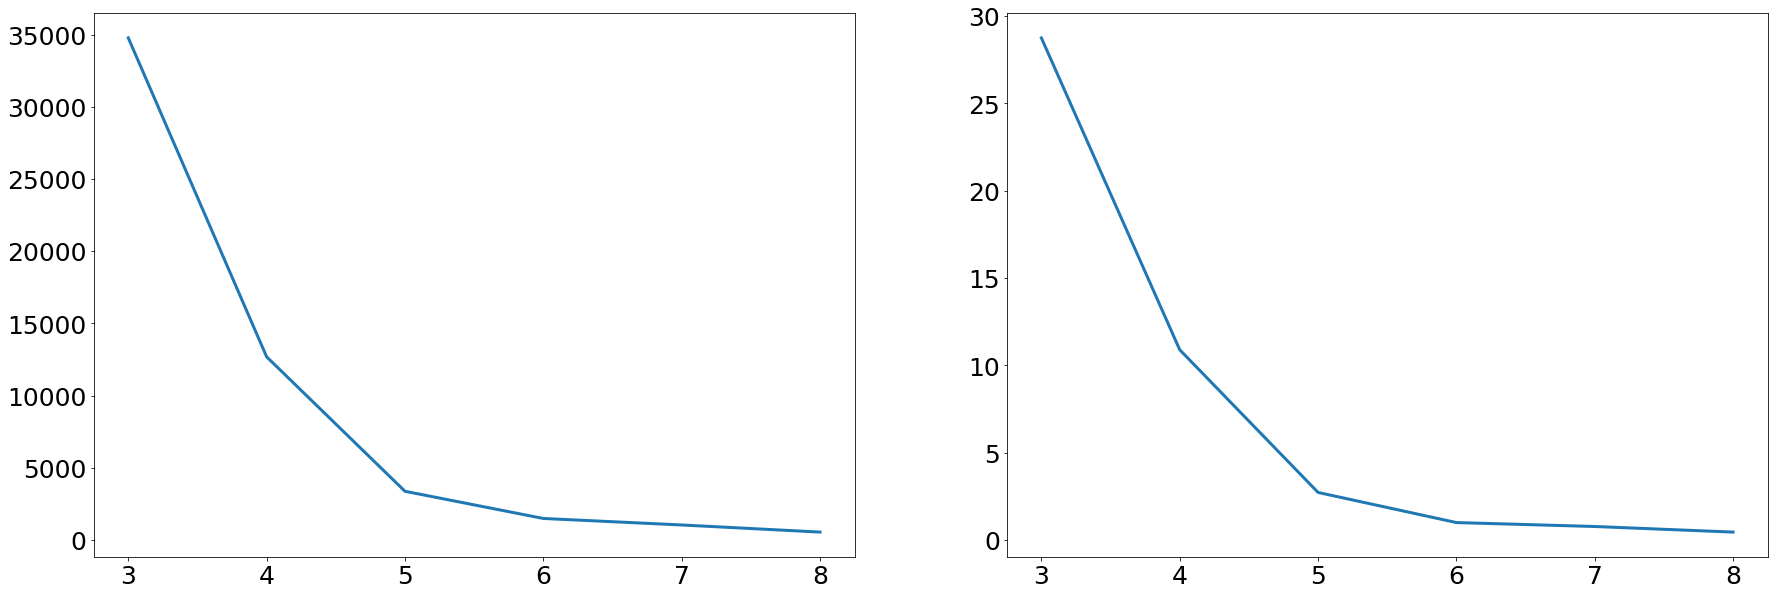

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

def polyfit(X, y, deg):
    poly_reg = PolynomialFeatures(deg)
    X_pol_fun = poly_reg.fit_transform(X.reshape(-1, 1))

    pol_lin = LinearRegression()
    pol_lin.fit(X_pol_fun, y)

    # viz_polymonial()

    y_hat = pol_lin.predict(X_pol_fun)

    print("GRADO: {}\n".format(deg))

    print('MAE:', mean_absolute_error(y, y_hat))
    print('MSE:', mean_squared_error(y, y_hat))
    print('RMSE:', np.sqrt(mean_squared_error(y, y_hat)))

    print("=========================")
    print("\n\n")

    return mean_absolute_error(y, y_hat), mean_absolute_percentage_error(y, y_hat) * 100
ls_mae = []
ls_mape = []
ls_deg = list(range(3, 9))
for i in ls_deg:
    ls_mae.append(polyfit(X, y, i)[0])
    ls_mape.append(polyfit(X, y, i)[1])

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].plot(ls_deg, ls_mae, linewidth=3)    
ax[1].plot(ls_deg, ls_mape, linewidth=3)  

for axx in ax:
    axx.tick_params(axis='both', labelsize=25)